In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('parkinsons.data')
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

# Drop 'name' column

In [8]:
df.drop('name', axis=1, inplace=True)

# EDA

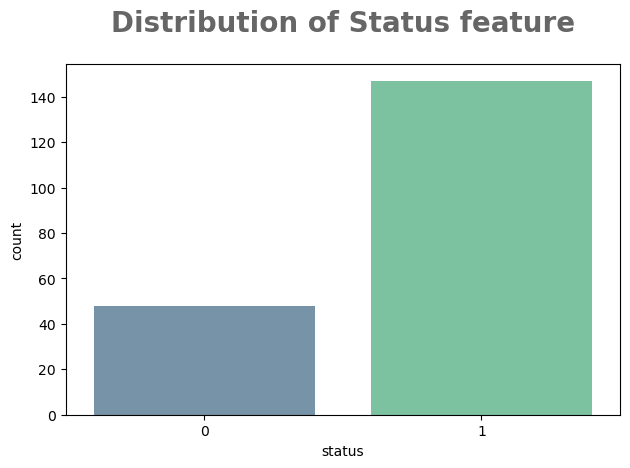

In [13]:
sns.countplot(x='status', data=df, palette='viridis', alpha=0.7)
plt.title('Distribution of Status feature', fontsize=20, 
          fontweight='bold', alpha=0.6, y=1.07)
plt.tight_layout()
plt.show()

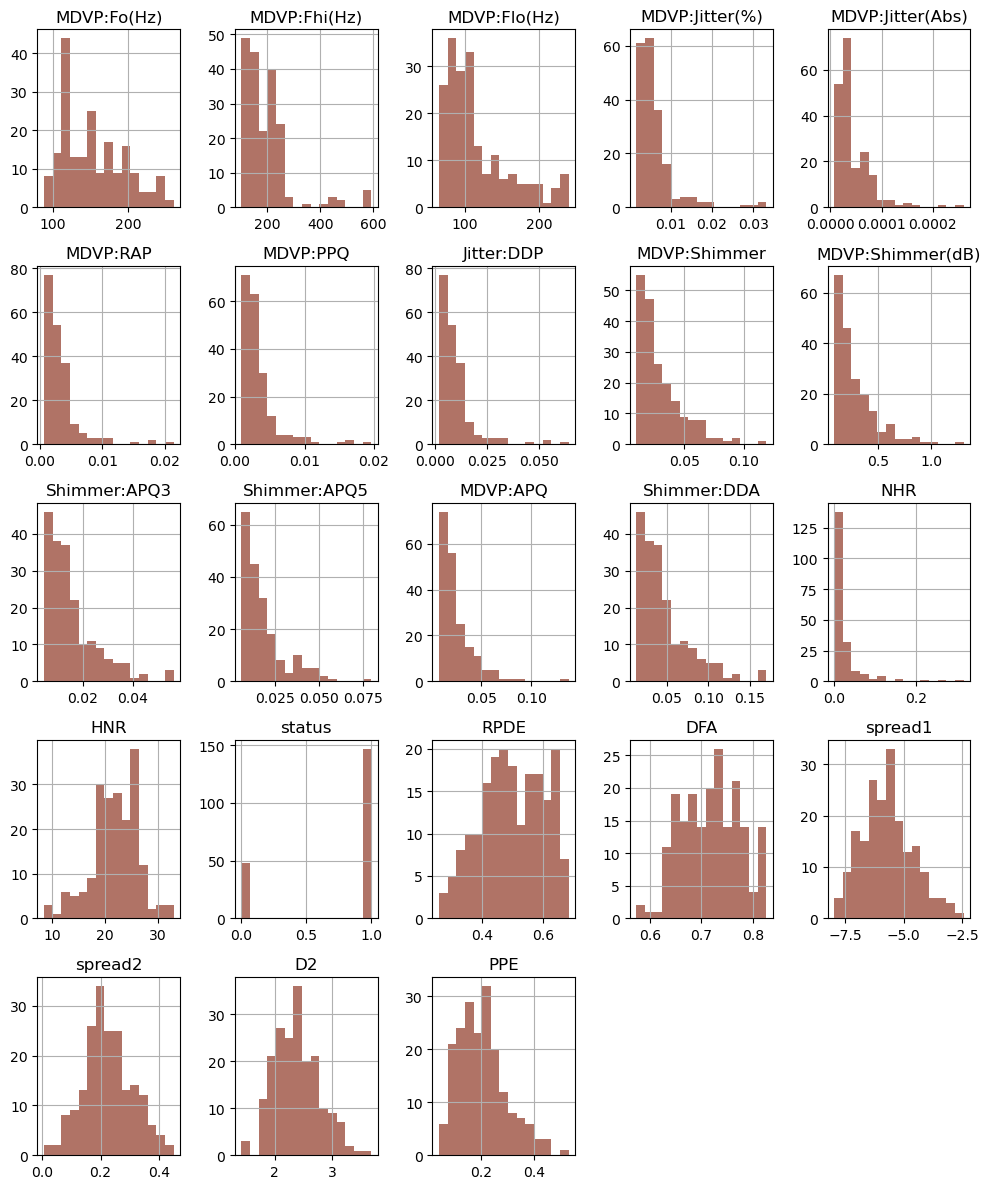

In [17]:
df.hist(bins=15, figsize=[10, 12], color='#B07366')
plt.tight_layout()
plt.show()

In [20]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [24]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

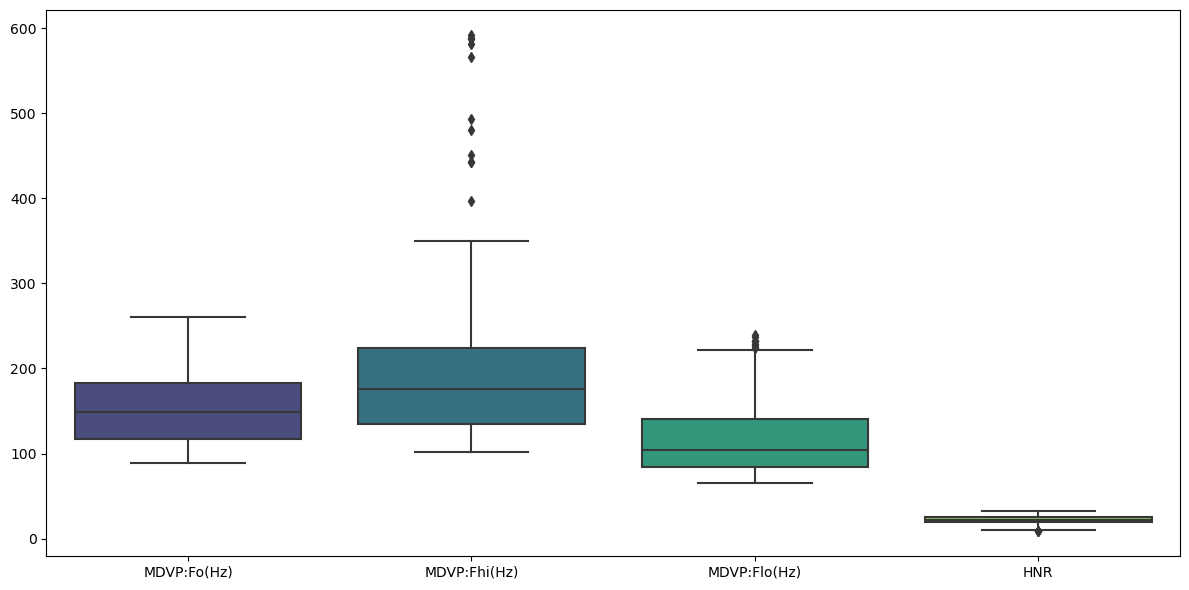

In [27]:
plt.figure(figsize=[12, 6])
sns.boxplot(data=df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR']], palette='viridis')
plt.tight_layout()
plt.show()

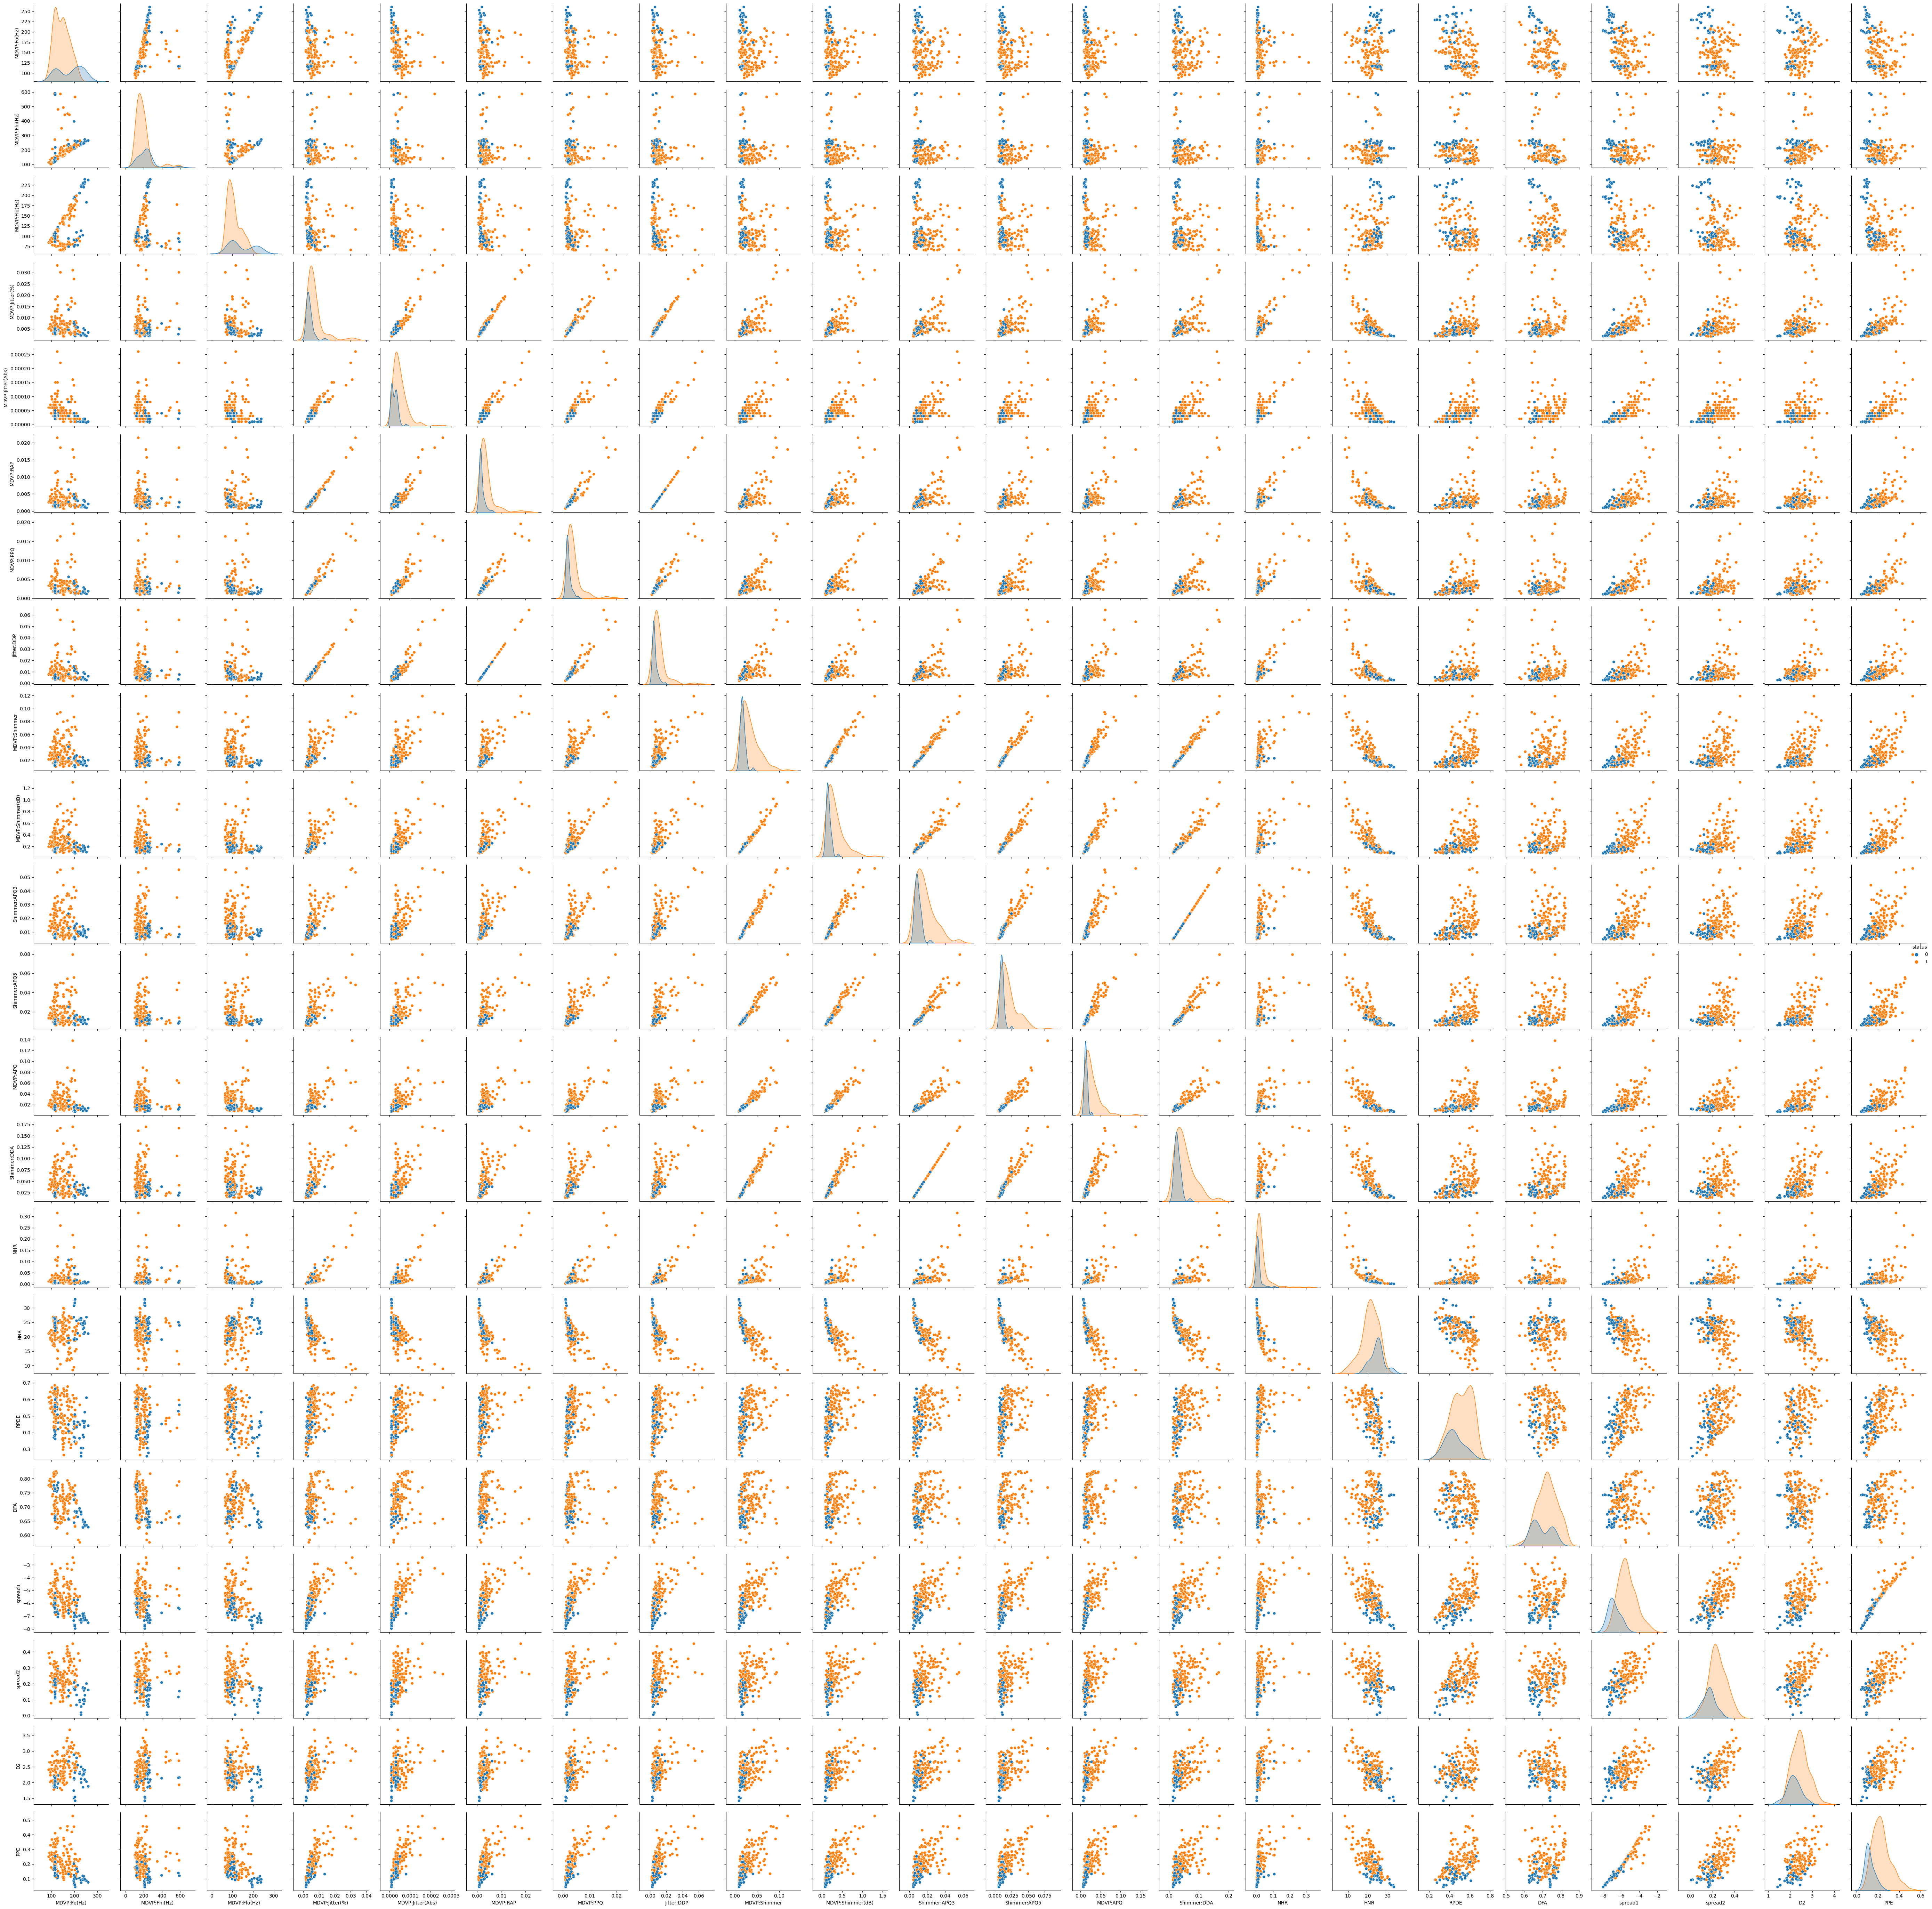

In [37]:
sns.pairplot(data=df, hue='status')
plt.tight_layout()
plt.show()

# Find the missing values

In [29]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Model training

In [34]:
X = df.drop('status', axis=1)
y = df['status']

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scale the skeweed Features

In [41]:
dataset_skew_values = X_train.skew()

In [43]:
transformed_features = []

In [46]:
# Train data
from scipy.stats import boxcox

for feature in X_train.columns:
    skewness = dataset_skew_values[feature]

    if skewness > 1:                                         # Right skewed
        if (X_train[feature]>0).all():
            X_train[feature] = np.log1p(X_train[feature])    # Log transform
        else:
            X_train[feature] = np.sqrt(X_train[feature] - X_train[feature].min() + 1)     # Square root
        transformed_features.append(feature)
    
    elif skewness < -1:
        X_train[feature], _ = boxcox(X_train[feature] - X_train[feature].min() + 1)       # BoxCox
        transformed_features.append(feature)



# Test data

for feature in X_test.columns:
    skewness = dataset_skew_values[feature]

    if skewness>1:
        if (X_test[feature]>0).all():
            X_test[feature] = np.log1p(X_test[feature])
        else:
            X_test[feature] = np.sqrt(X_test[feature] - X_test[feature].min() + 1)
        transformed_features.append(feature)
    
    elif skewness<-1:
        X_test[feature] = boxcox(X_test[feature] - X_test[feature].min() + 1)
        transformed_features.append(feature)

# Fix the outliers

In [51]:
def fix_outliers(feature):
    iqr = X_train[feature].quantile(0.75) - X_train[feature].quantile(0.25)
    upper = X_train[feature].quantile(0.75) + (1.5*iqr)
    lower = X_train[feature].quantile(0.25) - (1.5*iqr)
    X_train[feature] = np.clip(X_train[feature], lower, upper)
    X_test[feature] = np.clip(X_test[feature], lower, upper)

for feature in X_train.columns:
    fix_outliers(feature)

# apply StandardScaler only on less skewed features

In [56]:
from sklearn.preprocessing import StandardScaler

In [58]:
less_skwed = [feature for feature in X_train if feature not in transformed_features]
less_skwed

['MDVP:Fo(Hz)',
 'MDVP:Flo(Hz)',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2']

In [60]:
scale = StandardScaler()

X_train[less_skwed] = scale.fit_transform(X_train[less_skwed])
X_test[less_skwed] = scale.transform(X_test[less_skwed])

# Feature Selection

In [65]:
def correlation(dataset, threshold):
    col_set = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_set.add(col_name)
    return col_name

In [75]:
del_feature = correlation(X_train, 0.6)
X_train.drop(del_feature, axis=1, inplace=True)
X_test.drop(del_feature, axis=1, inplace=True)

# Save the datasets

In [89]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)